In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import pandas as pd
import math

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

from sklearn.ensemble import RandomForestRegressor   

## Loading the data + preprocessing

In [2]:
pd_data = pd.read_csv('boston.csv')

Piece of dataset

In [3]:
pd_data.head(10)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311.0,15.2,386.71,17.10,18.9


In [4]:
pd_data.shape

(506, 14)

In [5]:
pd_data.info() # seems like there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Histograms

array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>,
        <AxesSubplot:title={'center':'MEDV'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

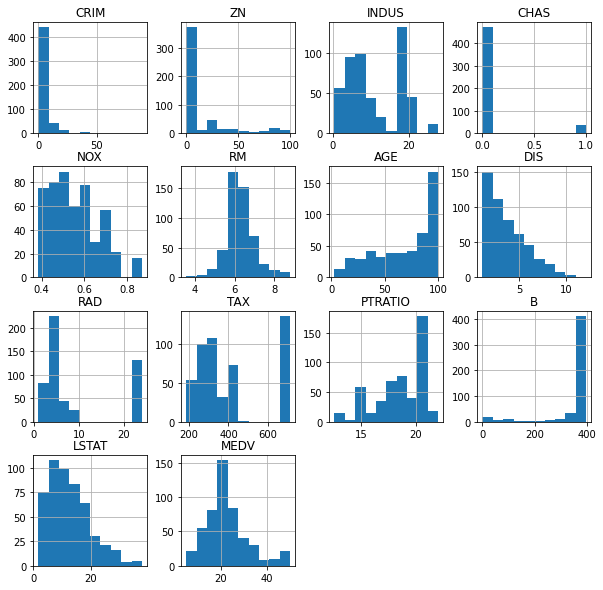

In [6]:
pd_data.hist(figsize=(10,10)) # visualising the distrbution of data

Corelation matrixx

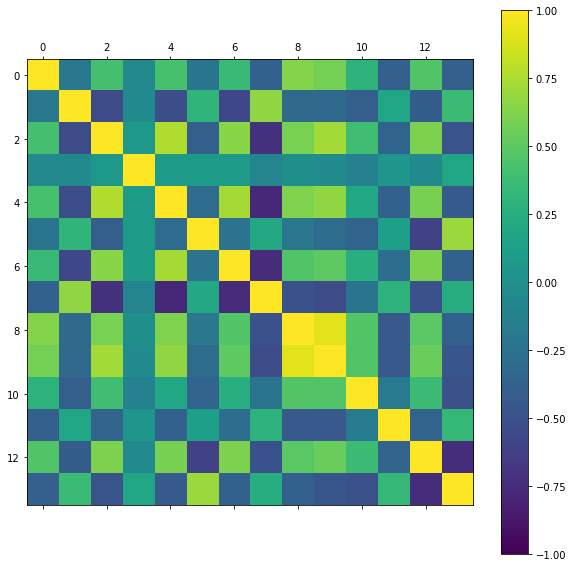

In [7]:
correlations = pd_data.corr()
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
plt.show()

## Heatmap

In [9]:
import seaborn as sns #heatmap

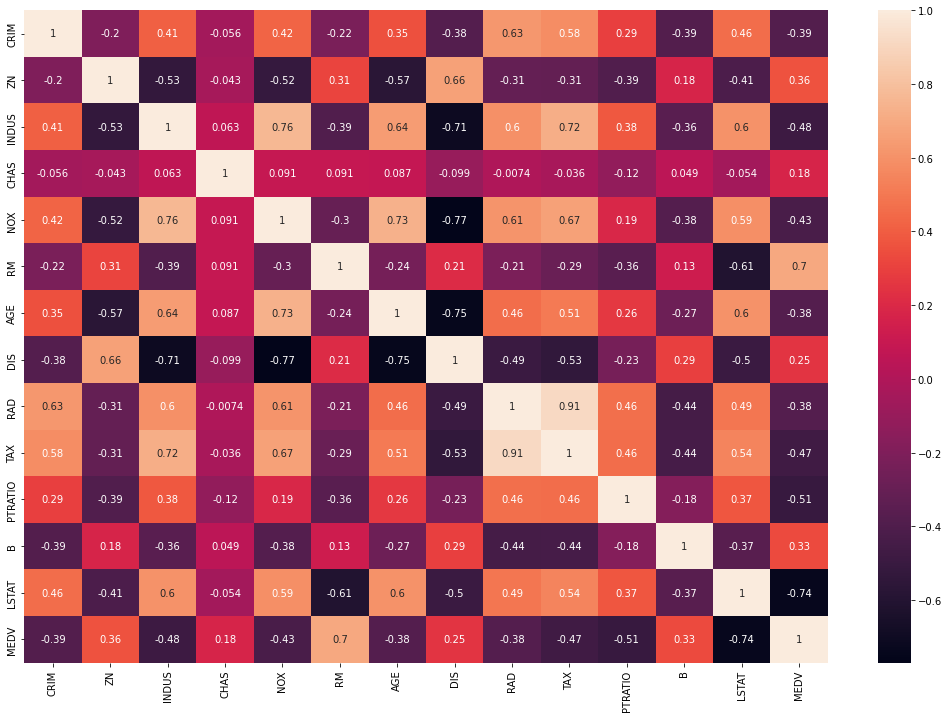

In [11]:
plt.figure(figsize=(18,12))
sns.heatmap(pd_data.corr(), annot=True)
plt.xticks(rotation=90)
plt.show()

## Split to train X and Y

In [7]:
pd_data_X = pd_data[pd_data.columns[0:-2]]
pd_data_Y = pd_data[pd_data.columns[-1]]

In [8]:
#data_X = pd_data

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(pd_data_X, pd_data_Y,
                                                    train_size=0.75, test_size=0.25, random_state=42)

In [17]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train_s = pd.DataFrame(scaler.fit_transform(X_train),columns = X_train.columns)

scaler.fit(X_test)
X_test_s = pd.DataFrame(scaler.fit_transform(X_test),columns = X_test.columns)


## AUTO-ML USING TPOT

In [18]:
import timeit
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error

from tpot import TPOTRegressor

In [19]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [14]:


tpot_config = {
    'sklearn.ensemble.RandomForestRegressor': {
        'max_depth': np.arange(1,250), 
        'n_estimators': np.arange(1,250), 
        'criterion': ['mae','mse'], 
        'max_features' : ["sqrt","log2"]
        
    },

    'sklearn.neighbors.KNeighborsRegressor': {
        'n_neighbors':np.arange(1,50), 
        'weights' : ['uniform', 'distance'], 
        'algorithm': ['ball_tree', 'kd_tree', 'brute'],
        'leaf_size': np.arange(1,50),
        'metric' : ['euclidean', 'manhattan', 'minkowski']
    },

    'sklearn.svm.SVR': {
        'kernel':['linear', 'poly', 'rbf', 'sigmoid', 'precomputed'], 
        'C': [0.00001,0.0001,0.001,0.01,0.1,1], 
        'gamma': ['scale','auto']
    }
}


# instantiate tpot 
tpot = TPOTRegressor(verbosity=3,  
                    random_state=55, 
                    scoring='neg_mean_squared_error',
                    periodic_checkpoint_folder="intermediate_results",
                    n_jobs=-1, 
                    warm_start = True,
                    generations=100, 
                    population_size=100,
                    early_stop=8,
                    config_dict=tpot_config)
times = []
scores = []
winning_pipes = []

# run 2 iterations
for x in range(1):
    start_time = timeit.default_timer()
    tpot.fit(X_train_s, y_train)
    elapsed = timeit.default_timer() - start_time
    times.append(elapsed)
    winning_pipes.append(tpot.fitted_pipeline_)
    scores.append(tpot.score(X_test_s, y_test))
    tpot.export('tpot_ames.py')

# output results
times = [time/60 for time in times]
print('Times:', times)
print('Scores:', scores)   
print('Winning pipelines:', winning_pipes)

3 operators have been imported by TPOT.


Optimization Progress:   0%|          | 0/10100 [00:00<?, ?pipeline/s]

_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 50x12 matrix..
_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 50x12 matrix..
_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 50x12 matrix..
_pre_test decorator: _random_mutation_operator: num_test=0 Precomputed matrix must be a square matrix. Input is a 50x12 matrix..

Generation 1 - Current Pareto front scores:

-1	-17.394226070498213	RandomForestRegressor(input_matrix, RandomForestRegressor__criterion=mae, RandomForestRegressor__max_depth=218, RandomForestRegressor__max_features=log2, RandomForestRegressor__n_estimators=142)

-2	-15.329423384453614	RandomForestRegressor(RandomForestRegressor(input_matrix, RandomForestRegressor__criterion=mse, RandomForestRegressor__max_depth=77, RandomForestRegressor__max_features=sqrt, RandomForestRegressor

c:\users\isili\appdata\local\programs\python\python38\lib\site-packages\sklearn\base.py:445: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
